<IPython.core.display.Javascript object>


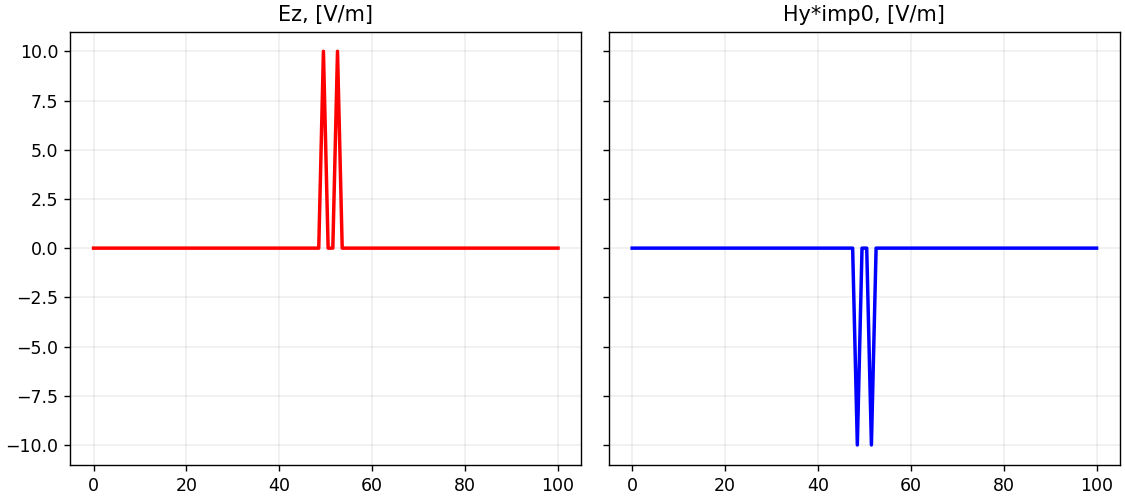

In [99]:
%matplotlib notebook
import numpy as np
import math as m
import matplotlib.pyplot as plt
import matplotlib.animation as animation 
from matplotlib.animation import FuncAnimation

# -*- coding: utf-8 -*-
"""
Created on Mon Feb 22 20:14:27 2021

@author: ashal
"""

size = 100
x_axis = np.linspace(0, size, size)
imp0 = 377
sigma = 10
step = 1
time = np.arange(0, size*step, step)
amplitude = 10
EZ = np.zeros((size*step, size))
HY = np.zeros((size*step, size))
ez = np.zeros(size)
hy = np.zeros(size)
source_position = int(size/2)

for t in time:
    ez[source_position] = amplitude*m.exp(-t**2/2*sigma**2)
    for x in range(size-1):
        hy[x] = hy[x] + (ez[x+1] - ez[x]) / imp0
        ez[x] = ez[x] + (hy[x] - hy[x-1]) * imp0
    EZ[t,:] = ez
    HY[t,:] = hy
    
m = 1 #коэффициент ускорения
fig, (ax1, ax2) = plt.subplots(1,2, constrained_layout=True, figsize=(9,4), sharey = True)

def animate(i):
    ax1.cla()
    ax1.plot(x_axis, EZ[m*i,:], color='red', lw=2)
    ax1.set_title('Ez, [V/m]')
#     ax1.xlabel('x')
#     ax1.ylabel('E, [V/m]')
    ax1.grid(ls='solid', lw=0.2)
   
    
    ax2.cla()
    ax2.plot(x_axis, HY[m*i,:]*imp0, color='blue', lw=2)
    ax2.set_title('Hy*imp0, [V/m]')
#     ax2.xlabel('x')
#     ax2.ylabel('H, [A/m]')
    ax2.grid(ls='solid', lw=0.2)
   
    
anim = animation.FuncAnimation(fig, animate, frames = int(len(time)/m), interval=100, repeat=False)